In [1]:
import pandas as pd
import numpy as np
import lasio

las = lasio.read(r'../../data_well_log/las_files_Lithostrat_data/7_1-1.las')
df = las.df()
df.tail()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,DCAL,MUDWEIGHT,ROP,RDEP,RSHA,RMED,SP,DTC,NPHI,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
2815.1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.430444,1.138537,1.139098,19.852074,NaN,NaN,NaN,NaN,NaN,2815.104736,450379.40625,6406641.0,-2780.967529
2815.2568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.510404,1.138337,1.139497,20.274757,NaN,NaN,NaN,NaN,NaN,2815.256836,450379.40625,6406641.0,-2781.119629
2815.4088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.591403,1.138057,1.138816,20.716501,NaN,NaN,NaN,NaN,NaN,2815.408691,450379.40625,6406641.0,-2781.271484
2815.5608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.136922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2815.7128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.134880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([   nan, 30000., 65000., 65030., 70000., 99000., 80000., 70032.])

In [4]:
df_filled = df.fillna(0)

In [5]:
df_filled.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,DCAL,MUDWEIGHT,ROP,RDEP,RSHA,RMED,SP,DTC,NPHI,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
82.6008,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82.7528,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82.9048,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83.0568,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83.2088,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_filled = df_filled.drop(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'X_LOC', 'Y_LOC', 'Z_LOC'], axis=1)

In [9]:
df_filled.columns

Index(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'CALI', 'BS', 'DCAL', 'MUDWEIGHT',
       'ROP', 'RDEP', 'RSHA', 'RMED', 'SP', 'DTC', 'NPHI', 'GR', 'RHOB',
       'DRHO', 'DEPTH_MD'],
      dtype='object')

In [18]:
columns = ['CALI', 'BS', 'DCAL', 'ROP', 'RDEP', 'RSHA', 'RMED', 'SP', 'DTC', 'NPHI', 'GR', 'RHOB', 'DRHO']

# Apply normalization to selected columns
df_normalized = df_filled[columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Concatenate the normalized columns with the remaining columns
# df_normalized = pd.concat([df_normalized, df_filled.drop(columns, axis=1)], axis=1)

df_normalized.head()


,CALI,BS,DCAL,ROP,RDEP,RSHA,RMED,SP,DTC,NPHI,GR,RHOB,DRHO
DEPT,,,,,,,,,,,,,
82.6008,0.0,1.0,0.551147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269537
82.7528,0.0,1.0,0.551147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269537
82.9048,0.0,1.0,0.551147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269537
83.0568,0.0,1.0,0.551147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269537
83.2088,0.0,1.0,0.551147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269537


In [90]:
X = df_normalized
y = df_filled['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [91]:
y.head()

DEPT
82.6008    0.0
82.7528    0.0
82.9048    0.0
83.0568    0.0
83.2088    0.0
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: float64

In [92]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11,
                 0: 12}

In [93]:
y = y.map(lithology_numbers)

In [118]:
y

DEPT
82.6008      12
82.7528      12
82.9048      12
83.0568      12
83.2088      12
             ..
2815.1048    12
2815.2568    12
2815.4088    12
2815.5608    12
2815.7128    12
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, Length: 17982, dtype: int64

In [134]:
X = X.transpose()
X

DEPT,82.6008,82.7528,82.9048,83.0568,83.2088,83.3608,83.5128,83.6648,83.8168,83.9688,...,2814.3448,2814.4968,2814.6488,2814.8008,2814.9528,2815.1048,2815.2568,2815.4088,2815.5608,2815.7128
CALI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BS,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DCAL,0.551147,0.551147,0.551147,0.551147,0.551147,0.551147,0.551147,0.551147,0.551147,0.551147,...,0.551147,0.551147,0.551147,0.551147,0.551147,0.551147,0.551147,0.551147,0.551147,0.551147
ROP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RDEP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.362230,0.350933,0.358334,0.369524,0.380698,0.400056,0.422419,0.445072,0.000000,0.000000
RSHA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.430313,0.430300,0.430393,0.430537,0.430688,0.430654,0.430579,0.430473,0.000000,0.000000
RMED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.429102,0.429141,0.429310,0.429480,0.429630,0.429781,0.429931,0.429674,0.428960,0.428189
SP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400955,0.399596,0.393261,0.385919,0.378569,0.382509,0.390653,0.399164,0.000000,0.000000
DTC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NPHI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


D: The number of depth points. This corresponds to the length of the DataFrame (df).

N: The number of logging curves (features). This corresponds to the length of the logging_curves list.

data: The values of the selected logging curves (logging_curves) from the DataFrame (X) converted into a NumPy array.

input_tensor: Reshaped tensor with dimensions (D, 1, N), where:

    The first dimension (D) represents the depth points.
    The second dimension (1) represents the channel. In this case, since we are dealing with 1D input data, it is set to 1.
    
The third dimension (N) represents the logging curves (features).


values along the x-axis correspond to the different logging curves, and the values along the y-axis correspond to the depth points.

In [124]:
# Reshape the DataFrame. The input data: 1D 
logging_curves = ['CALI', 'BS', 'DCAL', 'ROP', 'RDEP', 'RSHA', 'RMED', 'SP', 'DTC', 'NPHI', 'GR', 'RHOB', 'DRHO']
df_subset = X[logging_curves]

data = df_subset.to_numpy()

D = len(X) # Why is it the number of column when it has to be depth!!!!
N = len(logging_curves)
input_tensor = np.reshape(data, (D, 1, N))


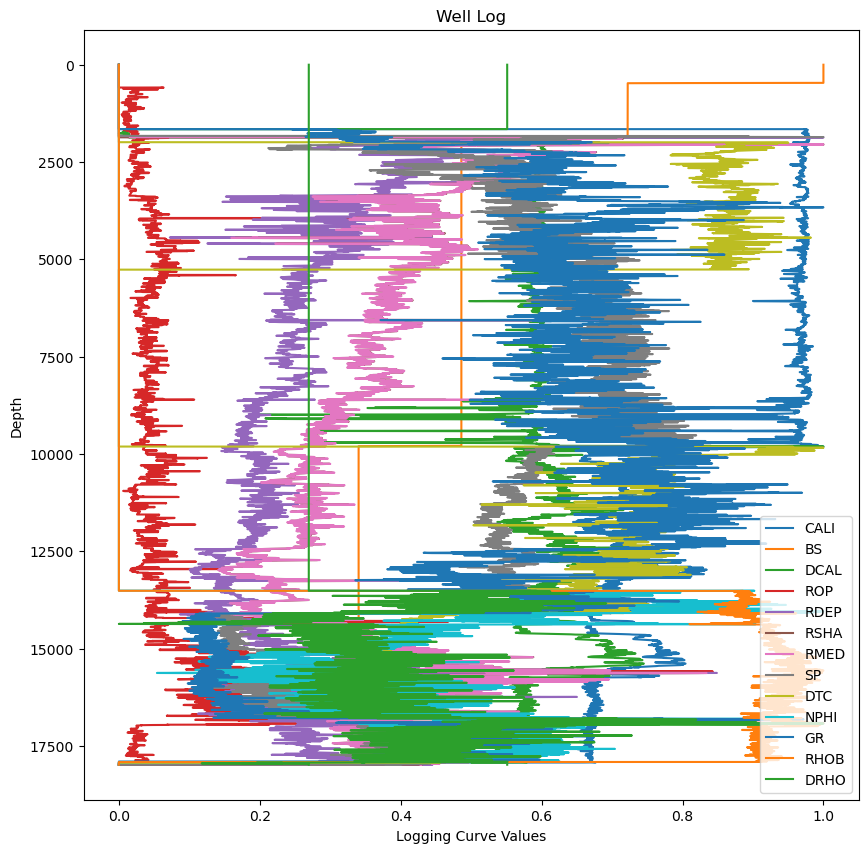

In [133]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the well log
for i, logging_curve in enumerate(logging_curves):
    ax.plot(input_tensor[:, 0, i], range(D), label=logging_curve)

# Customize the plot
ax.set_title('Well Log')
ax.set_xlabel('Logging Curve Values')
ax.set_ylabel('Depth')
ax.legend()

# Invert the y-axis to display depth from top to bottom
ax.invert_yaxis()

# Show the plot
plt.show()


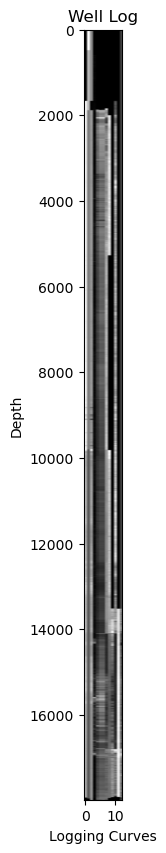

In [132]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(0.5, 10))

# Plot the well log as a grayscale image
im = ax.imshow(input_tensor[:, 0, :], cmap='gray', aspect='auto')

# Customize the plot
ax.set_title('Well Log')
ax.set_xlabel('Logging Curves')
ax.set_ylabel('Depth')

# Show the plot
plt.show()


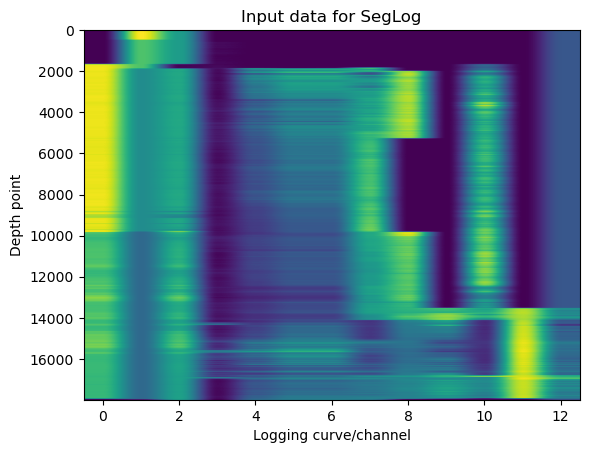

In [114]:
import matplotlib.pyplot as plt

# Plot input data
plt.figure()
plt.imshow(np.squeeze(input_tensor), aspect='auto')
plt.xlabel('Logging curve/channel')
plt.ylabel('Depth point')
plt.title('Input data for SegLog')


plt.show()


In [107]:
# # Reshape the DataFrame. The input data: M * N * K might not be correct


# M = len(X)
# print(f'{M}: M is depth points in each curve')
# N = len(X.columns)
# print(f'{N}: N is the number of logging curves')
# K = 1

# data = X.to_numpy()

# # Reshape the data into a 3D tensor
# input_tensor = np.reshape(data, (N, M, K))

17982: M is depth points in each curve
13: N is the number of logging curves
